## Converting a Project I did in R into Python

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [30]:
file_name = 'winequality-red.csv'
wine = pd.read_csv(file_name)

In [14]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

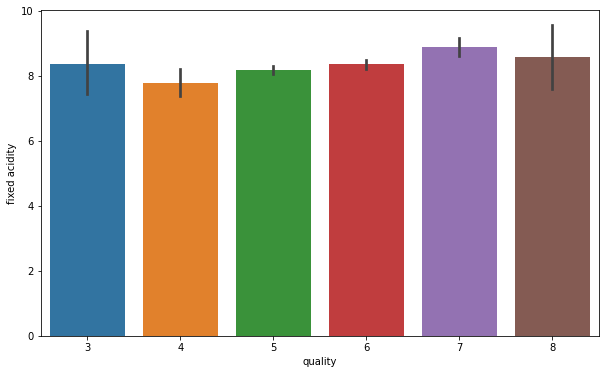

In [16]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

<AxesSubplot:xlabel='quality', ylabel='Count'>

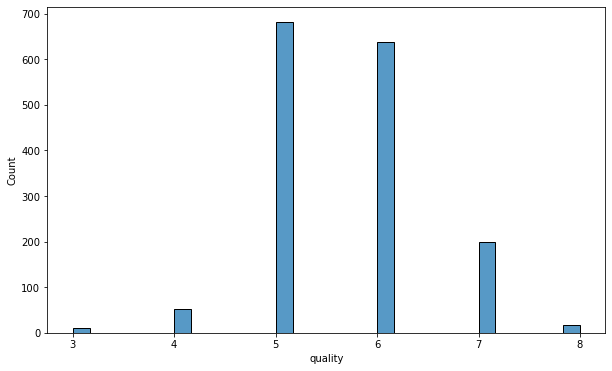

In [17]:
fig = plt.figure(figsize = (10,6))
sns.histplot(x = 'quality', data = wine)

In [31]:
bins=[0,6.5,8]
labels=["bad", "good"]
wine['quality'] = pd.cut(wine['quality'],bins=bins, labels=labels)

In [32]:
label = LabelEncoder()
wine['quality'] = label.fit_transform(wine['quality'])

In [33]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [34]:
X = wine.drop('quality', axis=1)
y = wine['quality']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [50]:
def classify_and_score(model):
    clf = model.fit(X_train, y_train)
    pred = clf.predict(X_test)
    print(classification_report(y_test, pred))
    print(confusion_matrix(y_test, pred))

## Logistic Regression

In [38]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

/Users/johngolec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
preds = clf.predict(X_test)

In [41]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       413
           1       0.54      0.21      0.30        67

    accuracy                           0.86       480
   macro avg       0.71      0.59      0.61       480
weighted avg       0.84      0.86      0.84       480



print(confusion_matrix(y_test, pred))

## Linear Discriminant Analysis (LDA)

In [45]:
clf2 = LinearDiscriminantAnalysis().fit(X_train, y_train)

In [46]:
preds2 = clf2.predict(X_test)

In [48]:
print(classification_report(y_test, preds2))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       413
           1       0.46      0.37      0.41        67

    accuracy                           0.85       480
   macro avg       0.68      0.65      0.66       480
weighted avg       0.84      0.85      0.85       480



In [49]:
print(confusion_matrix(y_test, preds2))

[[384  29]
 [ 42  25]]


## Quadratic Discriminant Analysis (QDA)

In [55]:
clf3 = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
preds3 = clf3.predict(X_test)

In [60]:
print(classification_report(y_test, preds3))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       413
           1       0.41      0.60      0.49        67

    accuracy                           0.82       480
   macro avg       0.67      0.73      0.69       480
weighted avg       0.86      0.82      0.84       480



In [61]:
print(confusion_matrix(y_test, preds3))

[[356  57]
 [ 27  40]]


## K-Nearest Neighbors (KNN)

In [62]:
clf4 = KNeighborsClassifier().fit(X_train, y_train)
preds4 = clf4.predict(X_test)

In [63]:
print(classification_report(y_test, preds4))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       413
           1       0.48      0.19      0.28        67

    accuracy                           0.86       480
   macro avg       0.68      0.58      0.60       480
weighted avg       0.83      0.86      0.83       480



In [64]:
print(confusion_matrix(y_test, preds4))

[[399  14]
 [ 54  13]]


## Support Vector Machine (SVM)

In [78]:
clf5 = SVC().fit(X_train, y_train)
preds5 = clf5.predict(X_test)

In [79]:
print(classification_report(y_test, preds5))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       413
           1       1.00      0.01      0.03        67

    accuracy                           0.86       480
   macro avg       0.93      0.51      0.48       480
weighted avg       0.88      0.86      0.80       480



In [80]:
print(confusion_matrix(y_test, preds5))

[[413   0]
 [ 66   1]]


 # NEW: Scale the Data!

In [81]:
sc = StandardScaler()

In [82]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [83]:
classify_and_score(LogisticRegression())

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       413
           1       0.62      0.30      0.40        67

    accuracy                           0.88       480
   macro avg       0.76      0.63      0.67       480
weighted avg       0.86      0.88      0.86       480

[[401  12]
 [ 47  20]]


In [84]:
classify_and_score(LinearDiscriminantAnalysis())

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       413
           1       0.49      0.36      0.41        67

    accuracy                           0.86       480
   macro avg       0.70      0.65      0.67       480
weighted avg       0.84      0.86      0.85       480

[[388  25]
 [ 43  24]]


In [85]:
classify_and_score(QuadraticDiscriminantAnalysis())

              precision    recall  f1-score   support

           0       0.92      0.87      0.90       413
           1       0.42      0.55      0.47        67

    accuracy                           0.83       480
   macro avg       0.67      0.71      0.69       480
weighted avg       0.85      0.83      0.84       480

[[361  52]
 [ 30  37]]


In [86]:
classify_and_score(KNeighborsClassifier())

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       413
           1       0.55      0.42      0.47        67

    accuracy                           0.87       480
   macro avg       0.73      0.68      0.70       480
weighted avg       0.86      0.87      0.86       480

[[390  23]
 [ 39  28]]


In [87]:
classify_and_score(SVC())

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       413
           1       0.68      0.28      0.40        67

    accuracy                           0.88       480
   macro avg       0.79      0.63      0.67       480
weighted avg       0.86      0.88      0.86       480

[[404   9]
 [ 48  19]]


# Statistical comparison of models using grid search

In [141]:
param_grid = [
    {"kernel": ["linear"]},
    {"kernel": ["poly"], "degree": [2, 3]},
    {"kernel": ["rbf"]},
]

svc = SVC(random_state=0)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)

search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='roc_auc', cv=cv)

In [142]:
search.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=10, random_state=0),
             estimator=SVC(random_state=0),
             param_grid=[{'kernel': ['linear']},
                         {'degree': [2, 3], 'kernel': ['poly']},
                         {'kernel': ['rbf']}],
             scoring='roc_auc')

In [143]:
results_df = pd.DataFrame(search.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
    ).rename_axis("kernel")
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
rbf,{'kernel': 'rbf'},1,0.851679,0.062575
linear,{'kernel': 'linear'},2,0.847634,0.044500
3_poly,"{'degree': 3, 'kernel': 'poly'}",3,0.825116,0.067431
2_poly,"{'degree': 2, 'kernel': 'poly'}",4,0.718282,0.081501


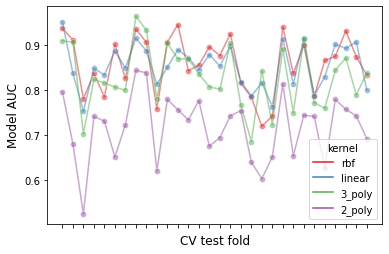

Correlation of models:
 kernel       rbf    linear    3_poly    2_poly
kernel                                        
rbf     1.000000  0.718923  0.694573  0.661934
linear  0.718923  1.000000  0.701806  0.638891
3_poly  0.694573  0.701806  1.000000  0.737381
2_poly  0.661934  0.638891  0.737381  1.000000


In [144]:
# create df of model scores ordered by performance
model_scores = results_df.filter(regex=r"split\d*_test_score")

# plot 30 examples of dependency between cv fold and AUC scores
fig, ax = plt.subplots()
sns.lineplot(
    data=model_scores.transpose().iloc[:30],
    dashes=False,
    palette="Set1",
    marker="o",
    alpha=0.5,
    ax=ax,
)
ax.set_xlabel("CV test fold", size=12, labelpad=10)
ax.set_ylabel("Model AUC", size=12)
ax.tick_params(bottom=True, labelbottom=False)
plt.show()

# print correlation of AUC scores across folds
print(f"Correlation of models:\n {model_scores.transpose().corr()}")

## Comparing two models: frequentist approach

In [145]:
import numpy as np
from scipy.stats import t


def corrected_std(differences, n_train, n_test):
    """Corrects standard deviation using Nadeau and Bengio's approach.

    Parameters
    ----------
    differences : ndarray of shape (n_samples,)
        Vector containing the differences in the score metrics of two models.
    n_train : int
        Number of samples in the training set.
    n_test : int
        Number of samples in the testing set.

    Returns
    -------
    corrected_std : float
        Variance-corrected standard deviation of the set of differences.
    """
    # kr = k times r, r times repeated k-fold crossvalidation,
    # kr equals the number of times the model was evaluated
    kr = len(differences)
    corrected_var = np.var(differences, ddof=1) * (1 / kr + n_test / n_train)
    corrected_std = np.sqrt(corrected_var)
    return corrected_std


def compute_corrected_ttest(differences, df, n_train, n_test):
    """Computes right-tailed paired t-test with corrected variance.

    Parameters
    ----------
    differences : array-like of shape (n_samples,)
        Vector containing the differences in the score metrics of two models.
    df : int
        Degrees of freedom.
    n_train : int
        Number of samples in the training set.
    n_test : int
        Number of samples in the testing set.

    Returns
    -------
    t_stat : float
        Variance-corrected t-statistic.
    p_val : float
        Variance-corrected p-value.
    """
    mean = np.mean(differences)
    std = corrected_std(differences, n_train, n_test)
    t_stat = mean / std
    p_val = t.sf(np.abs(t_stat), df)  # right-tailed t-test
    return t_stat, p_val

In [146]:
model_1_scores = model_scores.iloc[0].values  # scores of the best model
model_2_scores = model_scores.iloc[1].values  # scores of the second-best model

differences = model_1_scores - model_2_scores

n = differences.shape[0]  # number of test sets
df = n - 1
n_train = len(list(cv.split(X, y))[0][0])
n_test = len(list(cv.split(X, y))[0][1])

t_stat, p_val = compute_corrected_ttest(differences, df, n_train, n_test)
print(f"Corrected t-value: {t_stat:.3f}\nCorrected p-value: {p_val:.3f}")

Corrected t-value: 0.266
Corrected p-value: 0.395


In [147]:
t_stat_uncorrected = np.mean(differences) / np.sqrt(np.var(differences, ddof=1) / n)
p_val_uncorrected = t.sf(np.abs(t_stat_uncorrected), df)

print(
    f"Uncorrected t-value: {t_stat_uncorrected:.3f}\n"
    f"Uncorrected p-value: {p_val_uncorrected:.3f}"
)

Uncorrected t-value: 0.925
Uncorrected p-value: 0.179


## Comparing two models: Bayesian approach

In [148]:
# initialize random variable
t_post = t(
    df, loc=np.mean(differences), scale=corrected_std(differences, n_train, n_test)
)

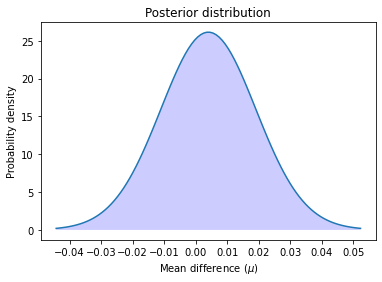

In [149]:
x = np.linspace(t_post.ppf(0.001), t_post.ppf(0.999), 100)

plt.plot(x, t_post.pdf(x))
plt.xticks(np.arange(-0.04, 0.06, 0.01))
plt.fill_between(x, t_post.pdf(x), 0, facecolor="blue", alpha=0.2)
plt.ylabel("Probability density")
plt.xlabel(r"Mean difference ($\mu$)")
plt.title("Posterior distribution")
plt.show()

In [150]:
better_prob = 1 - t_post.cdf(0)

print(
    f"Probability of {model_scores.index[0]} being more accurate than "
    f"{model_scores.index[1]}: {better_prob:.3f}"
)
print(
    f"Probability of {model_scores.index[1]} being more accurate than "
    f"{model_scores.index[0]}: {1 - better_prob:.3f}"
)

Probability of rbf being more accurate than linear: 0.605
Probability of linear being more accurate than rbf: 0.395


### Region of Practical Equivalence

In [151]:
rope_interval = [-0.01, 0.01]
rope_prob = t_post.cdf(rope_interval[1]) - t_post.cdf(rope_interval[0])

print(
    f"Probability of {model_scores.index[0]} and {model_scores.index[1]} "
    f"being practically equivalent: {rope_prob:.3f}"
)

Probability of rbf and linear being practically equivalent: 0.473


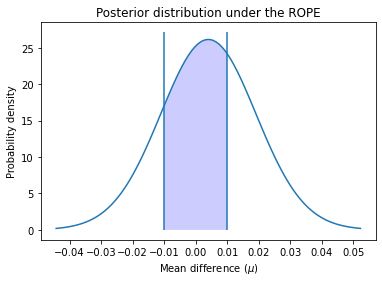

In [152]:
x_rope = np.linspace(rope_interval[0], rope_interval[1], 100)

plt.plot(x, t_post.pdf(x))
plt.xticks(np.arange(-0.04, 0.06, 0.01))
plt.vlines([-0.01, 0.01], ymin=0, ymax=(np.max(t_post.pdf(x)) + 1))
plt.fill_between(x_rope, t_post.pdf(x_rope), 0, facecolor="blue", alpha=0.2)
plt.ylabel("Probability density")
plt.xlabel(r"Mean difference ($\mu$)")
plt.title("Posterior distribution under the ROPE")
plt.show()

In [153]:
cred_intervals = []
intervals = [0.5, 0.75, 0.95]

for interval in intervals:
    cred_interval = list(t_post.interval(interval))
    cred_intervals.append([interval, cred_interval[0], cred_interval[1]])

cred_int_df = pd.DataFrame(
    cred_intervals, columns=["interval", "lower value", "upper value"]
).set_index("interval")
cred_int_df

,lower value,upper value
interval,,
0.50,-0.006258,0.014348
0.75,-0.013565,0.021655
0.95,-0.026152,0.034243


## Pairwise comparison of all models: frequentist approach

In [154]:
from itertools import combinations
from math import factorial

n_comparisons = factorial(len(model_scores)) / (
    factorial(2) * factorial(len(model_scores) - 2)
)
pairwise_t_test = []

for model_i, model_k in combinations(range(len(model_scores)), 2):
    model_i_scores = model_scores.iloc[model_i].values
    model_k_scores = model_scores.iloc[model_k].values
    differences = model_i_scores - model_k_scores
    t_stat, p_val = compute_corrected_ttest(differences, df, n_train, n_test)
    p_val *= n_comparisons  # implement Bonferroni correction
    # Bonferroni can output p-values higher than 1
    p_val = 1 if p_val > 1 else p_val
    pairwise_t_test.append(
        [model_scores.index[model_i], model_scores.index[model_k], t_stat, p_val]
    )

pairwise_comp_df = pd.DataFrame(
    pairwise_t_test, columns=["model_1", "model_2", "t_stat", "p_val"]
).round(3)
pairwise_comp_df

,model_1,model_2,t_stat,p_val
0,rbf,linear,0.266,1.000
1,rbf,3_poly,1.489,0.419
2,rbf,2_poly,6.180,0.000
3,linear,3_poly,1.338,0.552
4,linear,2_poly,5.854,0.000
5,3_poly,2_poly,5.498,0.000


## Pairwise comparison of all models: Bayesian approach

In [155]:
pairwise_bayesian = []

for model_i, model_k in combinations(range(len(model_scores)), 2):
    model_i_scores = model_scores.iloc[model_i].values
    model_k_scores = model_scores.iloc[model_k].values
    differences = model_i_scores - model_k_scores
    t_post = t(
        df, loc=np.mean(differences), scale=corrected_std(differences, n_train, n_test)
    )
    worse_prob = t_post.cdf(rope_interval[0])
    better_prob = 1 - t_post.cdf(rope_interval[1])
    rope_prob = t_post.cdf(rope_interval[1]) - t_post.cdf(rope_interval[0])

    pairwise_bayesian.append([worse_prob, better_prob, rope_prob])

pairwise_bayesian_df = pd.DataFrame(
    pairwise_bayesian, columns=["worse_prob", "better_prob", "rope_prob"]
).round(3)

pairwise_comp_df = pairwise_comp_df.join(pairwise_bayesian_df)
pairwise_comp_df

,model_1,model_2,t_stat,p_val,worse_prob,better_prob,rope_prob
0,rbf,linear,0.266,1.000,0.179,0.348,0.473
1,rbf,3_poly,1.489,0.419,0.022,0.822,0.156
2,rbf,2_poly,6.180,0.000,0.000,1.000,0.000
3,linear,3_poly,1.338,0.552,0.028,0.771,0.201
4,linear,2_poly,5.854,0.000,0.000,1.000,0.000
5,3_poly,2_poly,5.498,0.000,0.000,1.000,0.000
